# ABC notebook
This notebook outlines the After/Before Comparisons (ABC) between many different statistics of Large Scale Structure. In this notebook I will attempt to create meaningful plots of comparative distributions that demonstrate the simple evolution of many aspects of LSS.

The contents are as follows:
   #### Data Import
Imports the dataset from GiggleZ cutout
   #### GRF Generation
Generates a GRF sample of the same size as the sample
   #### Phase/Amplitude Comparison
Compares the Phase and Amplitude distributions of the GRF and the Sample
   #### Power Spectra Comparison
Identify the underlying 'noise' spectra of the Amplitude and Phase power spectra. Compare the resulting spectra of the GRF and the Sample.
   #### Phase Gradient Comparison
Compare standard phase gradient distributions of the GRF and the Sample
   #### Vector Phase Gradient Comparison
Compare 3D phase gradient distributions of the GRF and the Sample.
   #### Information Entropy Comparison
Compare the Information Entropy of the GRF and the Sample. Apply for both standard and 3D phase gradients.
   #### KS test
  Compare whether two distributions come from a shared parent distribution. These tests appear throughout the notebook to test CDFs of various statistics.

# Data Import
Import the dataset and bin it. Create a 3D grid of the binned data and a 3D grid of k_total. Use the overdensity grid to calculate amplitudes and phases of the Sample.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spy
import os

cwd = os.getcwd() #Fetch the current working directory for the GitHub repository
data = np.loadtxt('{0}\GiggleZ_z0pt000.dat'.format(cwd)) #Load data file
x_data, y_data, z_data = data[:,0], data[:,1], data[:,2] #Assign x, y and z data values from columns 1, 2 and 3 from the data file
resolution = 32 #Dictates the number of bins in x,y,z (Use powers of 2)
field_length = 1000 #The length of x,y,z in Mpc/h
nx,ny,nz = resolution,resolution,resolution #number of bins in x, y and z. Stick to powers of 2!
lx,ly,lz = field_length,field_length,field_length #needs units (Mpc/h)! #length of each dimension
dx,dy,dz = lx/nx,ly/ny,lz/nz #length of each bin
datagrid = np.zeros((nx,ny,nz)) #initialize the data grid
datagrid, edges = np.histogramdd(np.vstack([x_data,y_data,z_data]).transpose(),bins=(nx,ny,nz),range=((0.,lx),(0.,ly),(0.,lz))) #bin data
kx = 2.*np.pi*np.fft.fftfreq(nx,d=lx/nx) 
ky = 2.*np.pi*np.fft.fftfreq(ny,d=ly/ny)
kz = 2.*np.pi*np.fft.fftfreq(nz,d=lz/nz)
k_tot = np.sqrt(kx[:,np.newaxis,np.newaxis]**2 + ky[np.newaxis,:,np.newaxis]**2 + kz[np.newaxis,np.newaxis,:]**2)

mean_density = np.float(len(x_data))/np.float(nx*ny*nz)
overdensities = datagrid/mean_density-1 +0j
FFTfield = np.fft.fftn(overdensities) #Perform a Fourier Transform on the density field
Samplitudes = np.sqrt(FFTfield.real**2 + FFTfield.imag**2)
Sphases = np.arctan2(FFTfield.imag, FFTfield.real)

# GRF Generation
Create the GRF of the same size as the imported sample. Calculate Amplitudes and Phases of GRF.

In [6]:
L_array = np.linspace(0,field_length,resolution) #Array for values of length
GRFgrid=np.zeros((resolution, resolution, resolution),dtype=complex) #Initial state of 3D grid (zeros)
sig = np.std(overdensities)
for i in range(0,resolution): #For loop to create a 3D grid
    for j in range(0,resolution):
        for k in range(0,resolution):
            GRFgrid[i,j,k] = np.random.normal(scale=sig) #Assigns each pixel a GRF value (standardised to GiggleZ statistics)
FFTgrid = np.fft.fftn(GRFgrid) #Perform a Fourier Transform on the density field
GRFamplitudes = np.sqrt(FFTgrid.real**2 + FFTgrid.imag**2)
GRFphases = np.arctan2(FFTgrid.imag, FFTgrid.real)

# Phase/Amplitude Comparison
## Amplitude Comparison
! Needs to be written when complete !

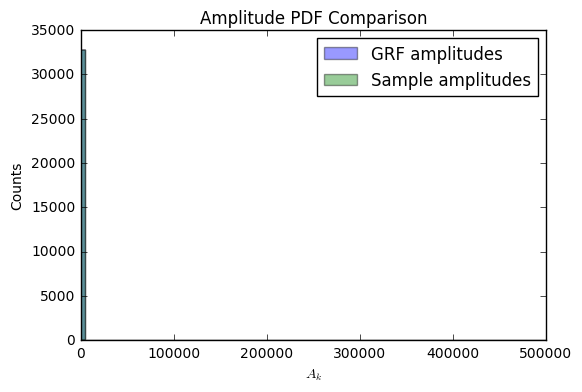

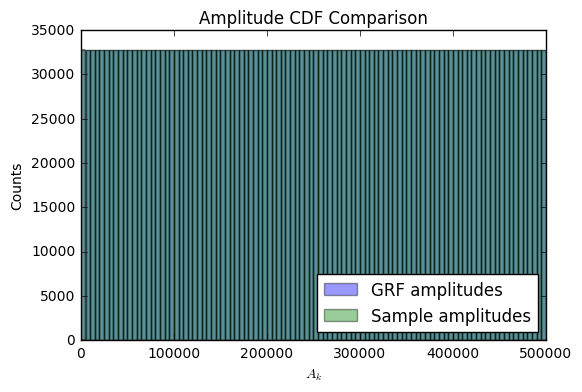

In [7]:
plt.close("all")

plt.figure('Amplitude PDF')
plt.title('Amplitude PDF Comparison')
plt.xlabel('$A_k$')
plt.ylabel('Counts')
plt.hist(GRFamplitudes.flatten(),bins=100, range=(0,5e5), alpha=0.4,normed=False,cumulative=False,label='GRF amplitudes')
plt.hist(Samplitudes.flatten(),bins=100, range=(0,5e5), alpha=0.4,normed=False,cumulative=False,label='Sample amplitudes')
plt.legend()

plt.figure('Amplitude CDF')
plt.title('Amplitude CDF Comparison')
plt.xlabel('$A_k$')
plt.ylabel('Counts')
plt.hist(GRFamplitudes.flatten(),bins=100, range=(0,5e5), alpha=0.4,normed=False,cumulative=True,label='GRF amplitudes')
plt.hist(Samplitudes.flatten(),bins=100, range=(0,5e5), alpha=0.4,normed=False,cumulative=True,label='Sample amplitudes')
plt.legend(loc=4)
plt.show()

## Phase Comparison
The sample and the GRF distributions are shown to be almost identical uniform distribtuions which span from $-\pi$ to $\pi$. This is not expected, however, as it is assumed that as LSS evolves, the phases tend to group up and the distribution is expected to not be uniform. The KS test confirms that the two distribtuions are almost certainly forms of the same distribution (uniform).

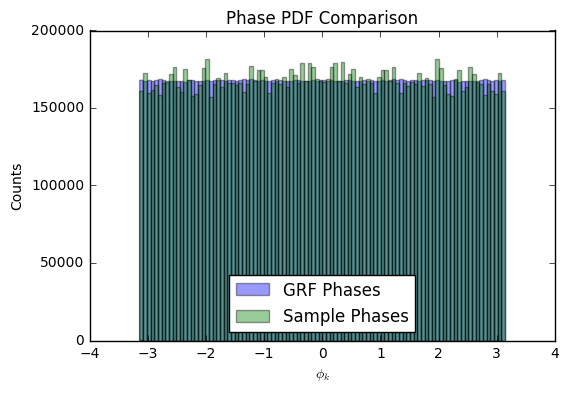

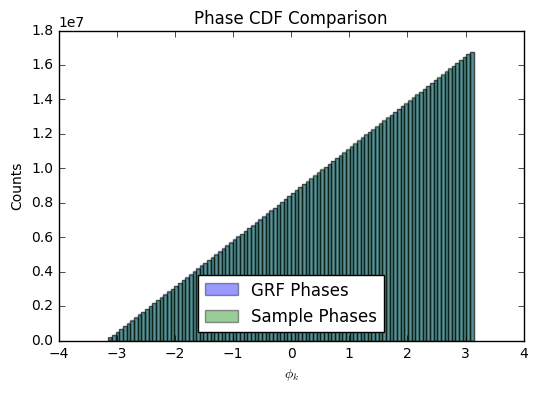

---KS Test---
Ks_2sampResult(statistic=0.0035102963447570801, pvalue=3.2439330403520908e-90)


In [87]:
plt.close("all")

plt.figure('Phase PDF')
plt.title('Phase PDF Comparison')
plt.xlabel('$\phi_k$')
plt.ylabel('Counts')
plt.hist(GRFphases.flatten(),bins=100,alpha=0.4,label='GRF Phases')
plt.hist(Sphases.flatten(),bins=100,alpha=0.4,label='Sample Phases')
plt.legend(loc=8)

plt.figure('Phase CDF')
plt.title('Phase CDF Comparison')
plt.xlabel('$\phi_k$')
plt.ylabel('Counts')
plt.hist(GRFphases.flatten(),bins=100,alpha=0.4,cumulative=True,label='GRF Phases')
plt.hist(Sphases.flatten(),bins=100,alpha=0.4,cumulative=True,label='Sample Phases')
plt.legend(loc=8)

plt.show()

print('---KS Test---')
kstest = spy.ks_2samp(Sphases.flatten(),GRFphases.flatten())
print(kstest)

# Power Spectra Comparison
### Amplitude Power Spectra
The noise-reduced amplitude power spectra show that the power spectrum of the GRF is uniform about a mean of zero and that the power spectrum of the sample spikes at very small wavelengths, with little-to-no large wavelength power. From this distribution it is possible to infer that the sample has a large amount of small structures that occupy a small fraction of the sample length (L), and that there are no structures which occupy a significant portion of the sample length. This observation is in agreement with the expected components of large scale structure.

### Phase Power Spectra
The noise-reduced phase power spectra show that the power spectrum of the GRF and the sample are almost identical, uniform distributions about a mean of zero. The sample distribution shows slightly higher points of phase power at certain values of $k_{total}$ - it is expected that the phases of evolved LSS become correlated, so these spikes in power may be related to this feature.

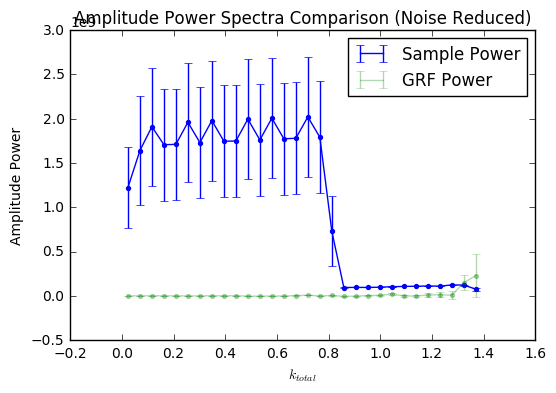

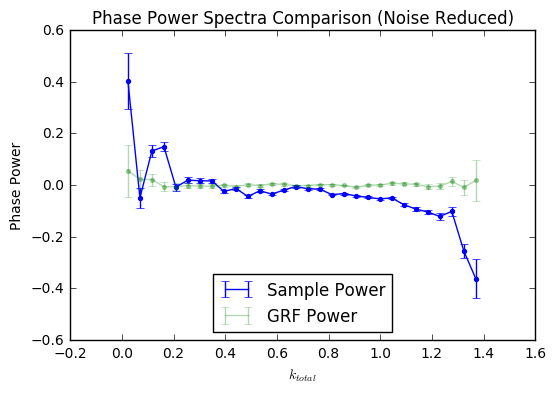

In [88]:
binnum = 30 #Number of total bins
kmin = np.min(k_tot)
kmax = np.max(k_tot)
dk = (kmax-kmin)/binnum #Width of a bin
ikbin = np.digitize(k_tot,np.linspace(kmin,kmax,binnum+1)) #Bin the values of k total into binnum
nmodes,pk,pk_err = np.zeros(binnum,dtype=int),np.full(binnum,-1.),np.full(binnum,-1.) #initialize nmodes and power spectrum
Samp_pwr = Samplitudes**2
GRFamp_pwr = GRFamplitudes**2
Sphase_pwr = Sphases**2
GRFphase_pwr = GRFphases**2
binmids=np.zeros(binnum)
binmids = np.linspace(kmin+0.5*dk, kmax-0.5*dk, binnum)

GRFshotnoise = resolution**3*sig**2
Sshotnoise = resolution**3*1/mean_density

#sigma_phase = np.std(GRFphases)
phasenoise = np.pi**2/3

#Initialize other power spectra arrays
GRFpk,phk,GRFphk = np.full(binnum,-1.),np.full(binnum,-1.),np.full(binnum,-1.)
GRFpk_err,phk_err,GRFphk_err = np.full(binnum,-1.),np.full(binnum,-1.),np.full(binnum,-1.)
for ik in range(binnum):
    nmodes[ik] = int(np.sum(np.array([ikbin == ik+1])))
    if (nmodes[ik] > 0):
        #GiggleZ Amp power spectrum
        pk[ik] = np.mean(Samp_pwr[ikbin == ik+1])
        pk_err[ik] = np.std(Samp_pwr[ikbin == ik+1])/np.sqrt(nmodes[ik]/2)
        #GRF Amp power spectrum
        GRFpk[ik] = np.mean(GRFamp_pwr[ikbin == ik+1])
        GRFpk_err[ik] = np.std(GRFamp_pwr[ikbin == ik+1])/np.sqrt(nmodes[ik]/2)
        #GiggleZ Phase power spectrum
        phk[ik] = np.mean(Sphase_pwr[ikbin == ik+1])
        phk_err[ik] = np.std(Sphase_pwr[ikbin == ik+1])/np.sqrt(nmodes[ik]/2)
        #GRF Phase power spectrum
        GRFphk[ik] = np.mean(GRFphase_pwr[ikbin == ik+1])
        GRFphk_err[ik] = np.std(GRFphase_pwr[ikbin == ik+1])/np.sqrt(nmodes[ik]/2)

plt.close("all")

plt.figure('AmpPwr Comparison')
plt.title('Amplitude Power Spectra Comparison (Noise Reduced)')
plt.xlabel('$k_{total}$')
plt.ylabel('Amplitude Power')
plt.scatter(binmids, (pk-Sshotnoise)*binmids**2, s=8, color='blue')
plt.errorbar(binmids,(pk-Sshotnoise)*binmids**2,pk_err*binmids**2,color='blue',label='Sample Power')
plt.scatter(binmids, (GRFpk-GRFshotnoise)*binmids**2, s=8, color='green', alpha=0.3)
plt.errorbar(binmids,(GRFpk-GRFshotnoise)*binmids**2,GRFpk_err*binmids**2,color='green',alpha=0.3, label='GRF Power')
plt.legend()

plt.figure('PhasePwr Comparison')
plt.title('Phase Power Spectra Comparison (Noise Reduced)')
plt.xlabel('$k_{total}$')
plt.ylabel('Phase Power')
plt.scatter(binmids, phk-phasenoise, s=8, color='blue')
plt.errorbar(binmids,phk-phasenoise,phk_err,color='blue',label='Sample Power')
plt.scatter(binmids, GRFphk-phasenoise, s=8, color='green',alpha=0.3)
plt.errorbar(binmids,GRFphk-phasenoise,GRFphk_err,color='green',alpha=0.3,label='GRF Power')
plt.legend(loc=8)

plt.show()

# Phase Gradient Comparison
The comparison shows that the phase gradient of the GRF and the sample are almost identical, and that P. Coles' assumption of circularly random variables is correct. The phase gradient of a uniform distribution is expected to be another uniform distribution, which can directly be seen in the comparison. As the phase distribution of the sample is uniform, it is expected that the phase gradient distribution is also uniform, however this is not the result we expect, given that the phase distribution of the sample should not be uniform.

In [89]:
GRFD_k = np.roll(GRFphases,1,axis=0)-GRFphases
SD_k = np.roll(Sphases,1,axis=0)-Sphases
for i in range(nx):
    for j in range(ny):
        for k in range(nz):
            if GRFD_k[i,j,k] < -np.pi:
                GRFD_k[i,j,k] += 2*np.pi
            if GRFD_k[i,j,k] > np.pi:
                GRFD_k[i,j,k] -= 2*np.pi
            if SD_k[i,j,k] < -np.pi:
                SD_k[i,j,k] += 2*np.pi
            if SD_k[i,j,k] > np.pi:
                SD_k[i,j,k] -= 2*np.pi
                
GRFdist = GRFD_k[GRFD_k != 0].flatten()
Sdist = SD_k[SD_k != 0].flatten()

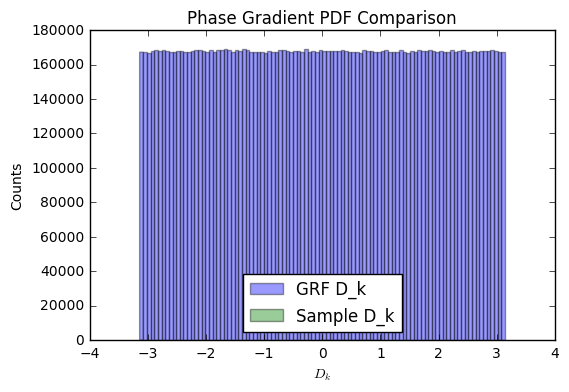

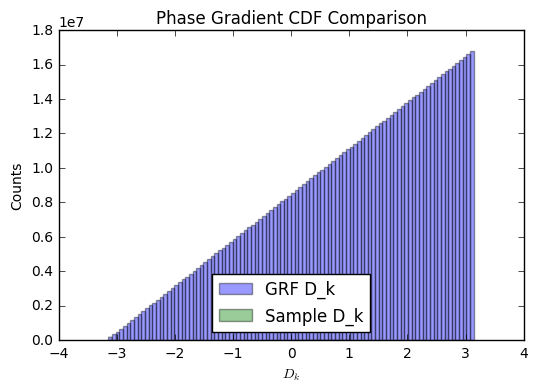

---KS Test---
Ks_2sampResult(statistic=0.50016307830810547, pvalue=0.0)


In [90]:
plt.close("all")

plt.figure('D_k PDF')
plt.title('Phase Gradient PDF Comparison')
plt.xlabel('$D_k$')
plt.ylabel('Counts')
plt.hist(GRFdist, bins=100, alpha=0.4, label='GRF D_k')
plt.hist(Sdist, bins=100, alpha=0.4, label='Sample D_k')
plt.legend(loc=8)

plt.figure('D_k CDF')
plt.title('Phase Gradient CDF Comparison')
plt.xlabel('$D_k$')
plt.ylabel('Counts')
plt.hist(GRFdist, bins=100, alpha=0.4, cumulative=True, label='GRF D_k')
plt.hist(Sdist, bins=100, alpha=0.4, cumulative=True, label='Sample D_k')
plt.legend(loc=8)

plt.show()

print('---KS Test---')
kstest = spy.ks_2samp(GRFD_k.flatten(),SD_k.flatten())
print(kstest)

Use the phase distribution an KStest to diagnose the 'fairness' of the sample. Non-uniform phases indicate strange structure and a non-fair sample (KStest p=0).

# Vector Phase Gradient Comparison

In [91]:
GRFD_kx = np.roll(GRFphases,1,axis=0)-GRFphases
GRFD_ky = np.roll(GRFphases,1,axis=1)-GRFphases
GRFD_kz = np.roll(GRFphases,1,axis=2)-GRFphases
SD_kx = np.roll(Sphases,1,axis=0)-Sphases
SD_ky = np.roll(Sphases,1,axis=1)-Sphases
SD_kz = np.roll(Sphases,1,axis=2)-Sphases

#Fix gradient values above pi and below -pi.
for i in range(nx):
    for j in range(ny):
        for k in range(nz):
            if GRFD_kx[i,j,k] < -np.pi:
                GRFD_kx[i,j,k] += 2*np.pi
            if GRFD_kx[i,j,k] > np.pi:
                GRFD_kx[i,j,k] -= 2*np.pi
            if GRFD_ky[i,j,k] < -np.pi:
                GRFD_ky[i,j,k] += 2*np.pi
            if GRFD_ky[i,j,k] > np.pi:
                GRFD_ky[i,j,k] -= 2*np.pi
            if GRFD_kz[i,j,k] < -np.pi:
                GRFD_kz[i,j,k] += 2*np.pi
            if GRFD_kz[i,j,k] > np.pi:
                GRFD_kz[i,j,k] -= 2*np.pi
                
            if SD_kx[i,j,k] < -np.pi:
                SD_kx[i,j,k] += 2*np.pi
            if SD_kx[i,j,k] > np.pi:
                SD_kx[i,j,k] -= 2*np.pi
            if SD_ky[i,j,k] < -np.pi:
                SD_ky[i,j,k] += 2*np.pi
            if SD_ky[i,j,k] > np.pi:
                SD_ky[i,j,k] -= 2*np.pi
            if SD_kz[i,j,k] < -np.pi:
                SD_kz[i,j,k] += 2*np.pi
            if SD_kz[i,j,k] > np.pi:
                SD_kz[i,j,k] -= 2*np.pi


GRFVdist = np.sqrt(GRFD_kx**2+GRFD_ky**2+GRFD_kz**2)
SVdist = np.sqrt(SD_kx**2+SD_ky**2+SD_kz**2)

GRFVdist = GRFVdist[GRFVdist != 0].flatten()
SVdist = SVdist[SVdist != 0].flatten()

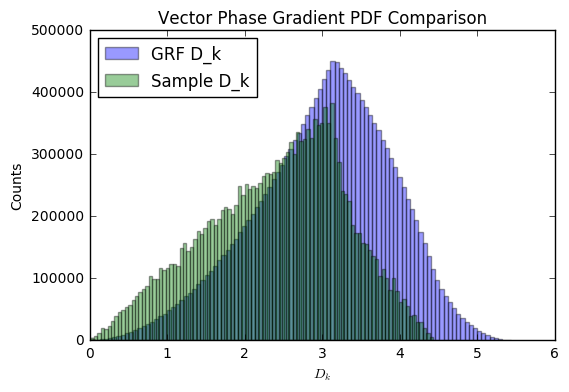

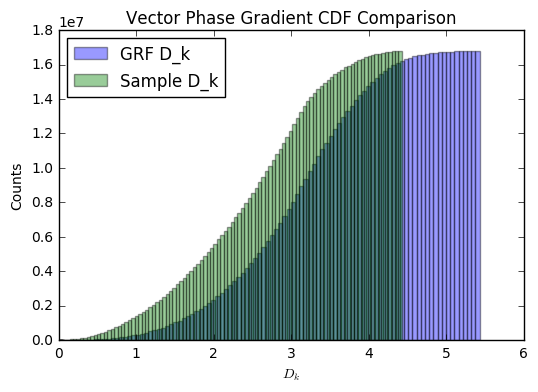

---KS Test---
Ks_2sampResult(statistic=0.26491707563400269, pvalue=0.0)


In [92]:
plt.close("all")

plt.figure('D_k PDF')
plt.title('Vector Phase Gradient PDF Comparison')
plt.xlabel('$D_k$')
plt.ylabel('Counts')
plt.hist(GRFVdist, bins=100, alpha=0.4, label='GRF D_k')
plt.hist(SVdist, bins=100, alpha=0.4, label='Sample D_k')
plt.legend(loc=2)

plt.figure('D_k CDF')
plt.title('Vector Phase Gradient CDF Comparison')
plt.xlabel('$D_k$')
plt.ylabel('Counts')
plt.hist(GRFVdist, bins=100, alpha=0.4, cumulative=True, label='GRF D_k')
plt.hist(SVdist, bins=100, alpha=0.4, cumulative=True, label='Sample D_k')
plt.legend(loc=2)

plt.show()

print('---KS Test---')
kstest = spy.ks_2samp(SVdist,GRFVdist)
print(kstest)

# Information Entropy Comparison

In [93]:
GRFS_D = -np.sum(GRFcdf*np.log(GRFcdf)*dx)
SS_D = -np.sum(Scdf*np.log(Scdf)*dx)
GRFVS_D = -np.sum(GRFVcdf*np.log(GRFVcdf)*dx)
SVS_D = -np.sum(SVcdf*np.log(SVcdf)*dx)

print('---Standard Phase Gradient---')
print('GRF:',GRFS_D)
print('Sample:',SS_D)
print('Difference:',GRFS_D-SS_D)
print('---Vector Phase Gradient---')
print('GRF:',GRFVS_D)
print('Sample:',SVS_D)
print('Difference:',GRFVS_D-SVS_D)

---Standard Phase Gradient---
GRF: -63510109.2555
Sample: nan
Difference: nan
---Vector Phase Gradient---
GRF: -58458539.2886
Sample: -59532371.861
Difference: 1073832.57235


C:\Users\Simon\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\Simon\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


# Phase Mapping

In [56]:
def ReturnMap(Map, m, n, o, bins=0):
    #Function for creating and returning a return map of shift (m,n,o)
    if bins==0:
        bins = 30
    rollX = np.roll(Map,m,axis=0)
    rollY = np.roll(rollX,n,axis=1)
    roll_map = np.roll(rollY,o,axis=2)
    returnmap, null, null = np.histogram2d(Map.flatten(), roll_map.flatten(), bins=bins)
    return returnmap

def GaussianFilter(ReturnMap, k_total): #Function for applying a Gaussian filter to a return map
    scale = 1. #Standard deviation of the Gaussian kernel
    kernel = np.exp(-k_total/(2.*scale**2))
    kernel_spectrum = np.fft.rfftn(kernel)
    norm = np.sum(ReturnMap)
    map_spectrum = np.fft.rfftn(ReturnMap)
    map_grid = np.fft.irfftn(map_spectrum*kernel_spectrum)
    map_grid *= norm/np.sum(ReturnMap)
    return map_grid #Returns the filtered return map

def MeanChiSquare(FilteredReturnMap):
    M = np.size(FilteredReturnMap) #Number of values in the return map
    p_bar = np.mean(FilteredReturnMap) #Average value of the entire map
    summation = np.sum((FilteredReturnMap-p_bar)**2/p_bar)
                
    return summation/M #Return the Mean Chi-Square value of the entire map

m = range(-10,10)
n = range(-10,10)
o = range(1,20)
karray = np.zeros((len(m), len(n), len(o)))
Chiarray = np.zeros((len(m), len(n), len(o)))
for i in m:
    for j in n:
        for k in o:
            Chiarray[i,j,k-1] = MeanChiSquare(ReturnMap(GRFphases, i, j, k, bins=5))
            karray[i,j,k-1] = np.sqrt(i**2+j**2+(k-1)**2)

# Phase Sum

In [9]:
def getphasesum(densgrid,kmin,kmax,nx,ny,nz,lx,ly,lz):
# FFT density grid
  densspec = np.fft.fftn(densgrid)
# Obtain grid of phases
  phasegrid = np.arctan2(np.imag(densspec),np.real(densspec))
# Determine wavenumber at each grid point
  kx = 2.*np.pi*np.fft.fftfreq(nx,d=lx/nx)
  ky = 2.*np.pi*np.fft.fftfreq(ny,d=ly/ny)
  kz = 2.*np.pi*np.fft.fftfreq(nz,d=lz/nz)
  kgrid = np.sqrt(kx[:,np.newaxis,np.newaxis]**2 + ky[np.newaxis,:,np.newaxis]**2 + kz[np.newaxis,np.newaxis,:]**2)
# (x,y,z) mode indices corresponding to each grid point
  ikxgrid = np.transpose(np.tile(np.arange(nx),(nz,ny,1)),(2,1,0))
  ikygrid = np.transpose(np.tile(np.arange(ny),(nx,nz,1)),(0,2,1))
  ikzgrid = np.transpose(np.tile(np.arange(nz),(ny,nx,1)),(1,0,2))
# This is a (true,false) grid of whether each mode is independent
  indep = getindep(nx,ny,nz)
# Determine list of modes lying in wavenumber range
  cut = (kgrid > kmin) & (kgrid < kmax)
  ikxlst,ikylst,ikzlst,indep = ikxgrid[cut],ikygrid[cut],ikzgrid[cut],indep[cut]
  nmodes = len(ikxlst)
# Just use the independent modes for k1
  ikxlst1,ikylst1,ikzlst1 = ikxlst[indep],ikylst[indep],ikzlst[indep]
  nmodes1 = len(ikxlst1)
  print (nmodes1,'modes in bin)')
# Loop over first mode k1
  phasesumlst = []
  for i in range(nmodes1):
    ix1,iy1,iz1 = ikxlst1[i],ikylst1[i],ikzlst1[i]
    if (np.mod(i,100) == 1):
        print ('Analyzing mode',i+1,'/',nmodes1)
# Loop over second mode k2
    for j in range(nmodes):
      ix2,iy2,iz2 = ikxlst[j],ikylst[j],ikzlst[j]
# Determine third mode k3 to close triangle
      ix3,iy3,iz3 = getk3(nx,ny,nz,ix1,iy1,iz1,ix2,iy2,iz2)
# Add up the phases of these modes
      phasesum = phasegrid[ix1,iy1,iz1] + phasegrid[ix2,iy2,iz2] + phasegrid[ix3,iy3,iz3]
# Map each phase sum into the [0,2*pi] interval
      phasesum = np.mod(phasesum,2.*np.pi)
# Add each phase sum to the list
      phasesumlst.append(phasesum)
  phasesumlst = np.array(phasesumlst)
  print (len(phasesumlst),'phase sums measured')
  return phasesumlst

# Determine third mode k3 to close triangle
def getk3(nx,ny,nz,ix1,iy1,iz1,ix2,iy2,iz2):
  ix3 = -(ix1+ix2)
  iy3 = -(iy1+iy2)
  iz3 = -(iz1+iz2)
# Map integers back into the [0,n] interval if required
  if (ix3 < 0):
    ix3 += nx
  if (iy3 < 0):
    iy3 += ny
  if (iz3 < 0):
    iz3 += nz
  return ix3,iy3,iz3

# This is a (true,false) grid of whether each mode is independent
def getindep(nx,ny,nz):
  indep = np.full((nx,ny,nz),False,dtype=bool)
  indep[:,:,1:int(nz/2)] = True
  indep[1:int(nx/2),:,0] = True
  indep[1:int(nx/2),:,int(nz/2)] = True
  indep[0,1:int(ny/2),0] = True
  indep[0,1:int(ny/2),int(nz/2)] = True
  indep[int(nx/2),1:int(ny/2),0] = True
  indep[int(nx/2),1:int(ny/2),int(nz/2)] = True
  indep[int(nx/2),0,0] = True
  indep[0,int(ny/2),0] = True
  indep[int(nx/2),int(ny/2),0] = True
  indep[0,0,int(nz/2)] = True
  indep[int(nx/2),0,int(nz/2)] = True
  indep[0,int(ny/2),int(nz/2)] = True
  indep[int(nx/2),int(ny/2),int(nz/2)] = True
  return indep

Phase_Sum_List = getphasesum(overdensities, 0.02, 0.03, nx, ny, nz, lx, ly, lz)

157 modes in bin)
Analyzing mode 2 / 157
Analyzing mode 102 / 157
49298 phase sums measured


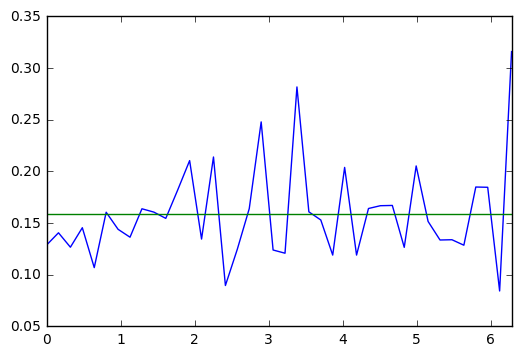

NameError: name 'karray' is not defined

In [10]:
pshist, null = np.histogramdd(Phase_Sum_List, normed=True, bins=40)
plt.close("all")
plt.figure()
plt.plot(np.linspace(0,2*np.pi,len(pshist)), pshist)
plt.plot([0,2*np.pi],[np.mean(pshist),np.mean(pshist)])
plt.xlim([0,2*np.pi])
plt.show()

plt.figure()
plt.scatter(karray.flatten(),Chiarray.flatten())
plt.show()